In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df_org = pd.read_csv("order_item-export.csv")

In [2]:
df_org

,order_id,inserted_at,updated_at,item_name,price_nok,category_name,customization_key,customization_value,price_increment_nok,constant_price
0,2h8feraee987wr8,2025-09-08 06:24:07.411Z,2025-09-08 06:24:07.708Z,Latte,10,Varm drikke,Melk,Hel,0,1
1,2h8feraee987wr8,2025-09-08 06:24:07.411Z,2025-09-08 06:24:07.708Z,Latte,10,Varm drikke,Kopp,Liten,10,1
2,2h8feraee987wr8,2025-09-08 06:24:07.411Z,2025-09-08 06:24:07.708Z,Latte,10,Varm drikke,Smak,Salt karamell,0,1
3,8ongct2f5xfef2u,2025-09-08 06:34:42.518Z,2025-09-08 06:34:42.820Z,Latte,10,Varm drikke,Kopp,Liten,10,1
4,kq17fr27xsp9y0l,2025-09-08 06:40:47.608Z,2025-09-08 06:40:47.911Z,Chai Latte,10,Varm drikke,Melk,Havre,0,1
...,...,...,...,...,...,...,...,...,...,...
915,rf13d0a6e0a64b0,2025-10-20T07:11:59.066365Z,2025-10-20T07:11:59.073715Z,Cortado,10,Varm drikke,Ekstra,Sirup,5,1
916,rf13d0a6e0a64b0,2025-10-20T07:11:59.066365Z,2025-10-20T07:11:59.073715Z,Cortado,10,Varm drikke,Smak,Hassel,0,1
917,r92ac4745d57e79,2025-10-20T07:14:34.485234Z,2025-10-20T07:14:34.486948Z,Cappuccino,10,Varm drikke,Kopp,Egen,0,1
918,r9d3d4830190d66,2025-10-20T07:16:28.761617Z,2025-10-20T07:16:28.764860Z,Latte,10,Varm drikke,Kopp,Egen,0,1


In [11]:
df = (
    df_org.groupby(["order_id", "item_name", "price_nok", "category_name"])
      .apply(lambda x: x.pivot_table(
          index=None,
          columns="customization_key",
          values="customization_value",
          aggfunc=lambda s: list(s)       # keep values as lists
      ), include_groups=False)
      .reset_index()
)

# flatten the multiindex columns created by pivot
df.columns = [c if not isinstance(c, tuple) else c[1] or c[0] for c in df.columns]


# Example: group by order + item + price + category
df = (
    df_org.groupby(["order_id", "item_name", "price_nok", "category_name"])
    .apply(lambda x: pd.DataFrame({
        # Pivot customization keys to lists
        **{key: [list(x.loc[:, "customization_value"][x["customization_key"] == key])] 
           for key in x["customization_key"].unique()},
        # Take sum or first of numeric columns for the group
        "price_increment_nok": [x["price_increment_nok"].sum()],
        "constant_price": [x["constant_price"].iloc[0]]
    }))
    .reset_index(drop=True)
)

# If needed, flatten columns (not strictly necessary here since we made dict keys simple)



In [12]:
df

,order_id,item_name,price_nok,category_name,level_4,Smak,Annet,Kopp,Melk,Ekstra
0,01998pxj9hc3us2,Islatte,10,Kald drikke,customization_value,[Vanilje],NaN,NaN,NaN,NaN
1,0269me8gxlmn3n2,Islatte,10,Kald drikke,customization_value,[Salt karamell],[Klippekort],[Egen],NaN,NaN
2,04k7u9nmystrm1x,Islatte,10,Kald drikke,customization_value,[Vanilje],NaN,NaN,NaN,NaN
3,05nl03f8ggl0l5b,Varm Sjokolade m/krem,10,Varm drikke,customization_value,NaN,NaN,[Egen],NaN,NaN
4,08wp022mnaux5yk,Latte,10,Varm drikke,customization_value,[Vanilje],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
607,z0jc0sly0bfu966,Latte,10,Varm drikke,customization_value,[Salt karamell],[Klippekort],[Egen],NaN,NaN
608,z9ho8o39dghcuu4,Latte,10,Varm drikke,customization_value,NaN,NaN,NaN,NaN,[Espresso]
609,zc3jtn9ev339t99,Varm Sjokolade m/krem,10,Varm drikke,customization_value,NaN,NaN,[Egen],NaN,NaN
610,zf95mwoz2a5rb5f,"Iste, Pasjonsfrukt",10,Kald drikke,customization_value,NaN,NaN,[Plastikkopp ],NaN,NaN


<Axes: ylabel='count'>

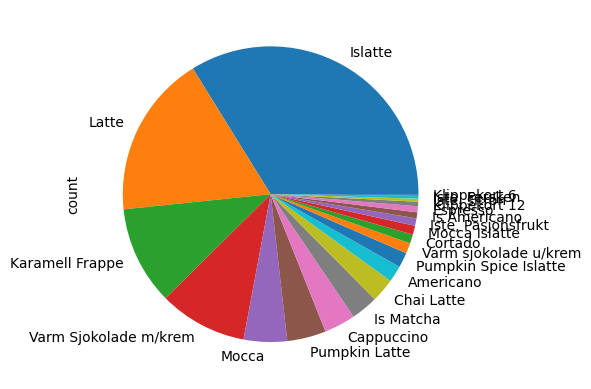

In [5]:
df["item_name"].value_counts().plot(kind="pie")

/nix/store/pbgrpi269z4i72vi5aph3vji2v9xw1ig-python3-3.13.8-env/lib/python3.13/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/nix/store/pbgrpi269z4i72vi5aph3vji2v9xw1ig-python3-3.13.8-env/lib/python3.13/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: title={'center': 'Correlation heatmap'}>

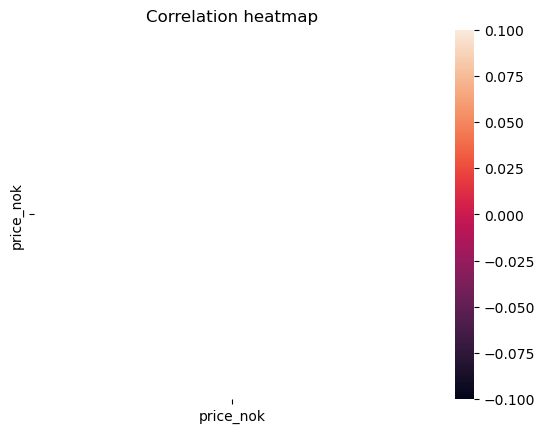

In [6]:
df_n = df.select_dtypes(include=["number"])
corr = df_n.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask)
ax.set_title("Correlation heatmap")
ax

<Axes: ylabel='count'>

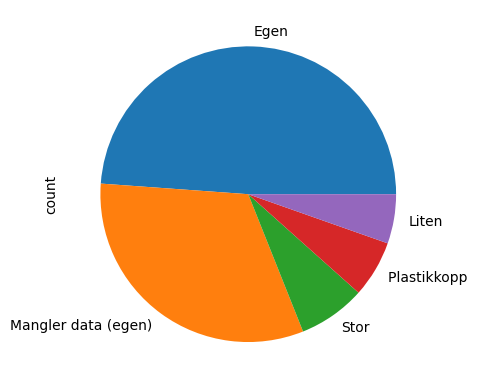

In [7]:
df["first"] = df["Kopp"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df["first"].fillna("Mangler data (egen)").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

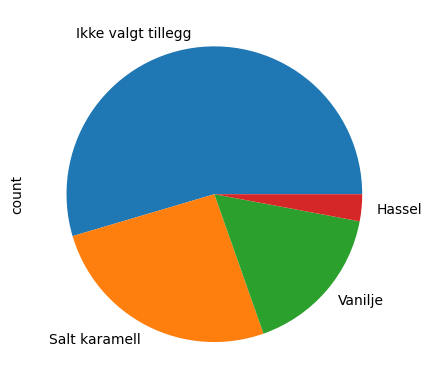

In [15]:
df["first"] = df["Smak"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df["first"].fillna("Ikke valgt tillegg").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

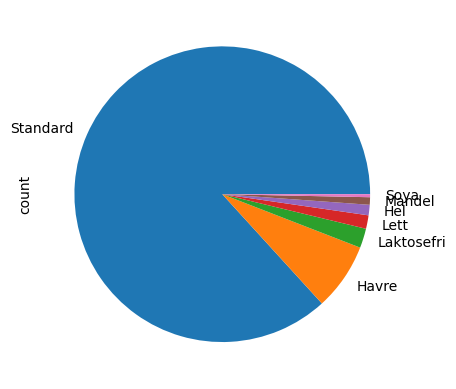

In [17]:
df["first"] = df["Melk"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df["first"].fillna("Standard").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

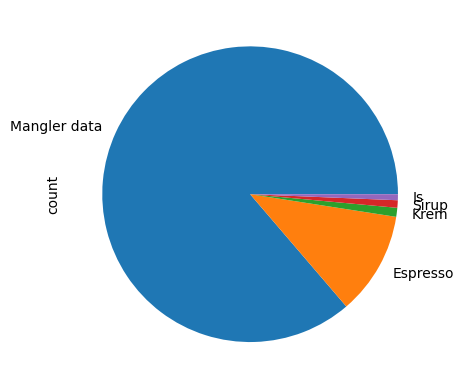

In [10]:
df["first"] = df["Ekstra"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df["first"].fillna("Mangler data").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

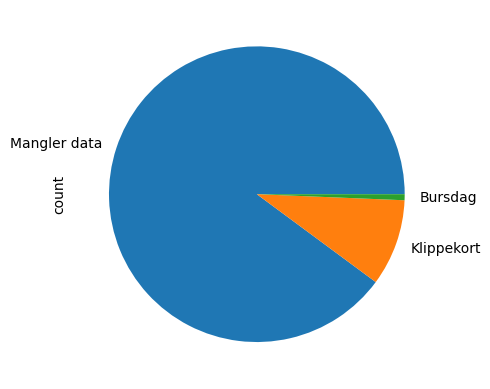

In [19]:
df["first"] = df["Annet"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df["first"].fillna("Mangler data").value_counts().plot(kind="pie")


In [20]:
df["first"].fillna("Mangler data").value_counts()

first
Mangler data    550
Klippekort       58
Bursdag           4
Name: count, dtype: int64